In [84]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

con = sqlite3.connect("/content/campus_data (1).db")

tables = pd.read_sql_query(
    "SELECT name FROM sqlite_master WHERE type='table';", con
)
print(tables)
con.close()

                          name
0                  weather_gov
1                transit_stops
2               transit_routes
3         historical_aq_openaq
4             weather_forecast
5  historical_air_quality_data
6     current_air_quality_data
7      historical_weather_data
8              vegetation_data


In [82]:
con = sqlite3.connect("/content/campus_data (1).db")

df = pd.read_sql_query("SELECT * FROM historical_aq_openaq LIMIT 5;", con)
df

,value,parameter_name,datetime_utc
0,3.6,pm25,2024-04-01T14:00:00Z
1,4.9,pm25,2024-04-01T15:00:00Z
2,5.8,pm25,2024-04-01T16:00:00Z
3,7.1,pm25,2024-04-01T17:00:00Z
4,6.7,pm25,2024-04-01T18:00:00Z


In [83]:
df = pd.read_sql_query("SELECT * FROM historical_aq_openaq;", con)

In [67]:
pm25 = df[df['parameter_name'] == 'pm25'].copy()
pm25['datetime_utc'] = pd.to_datetime(pm25['datetime_utc'])
pm25.sort_values('datetime_utc', inplace=True)

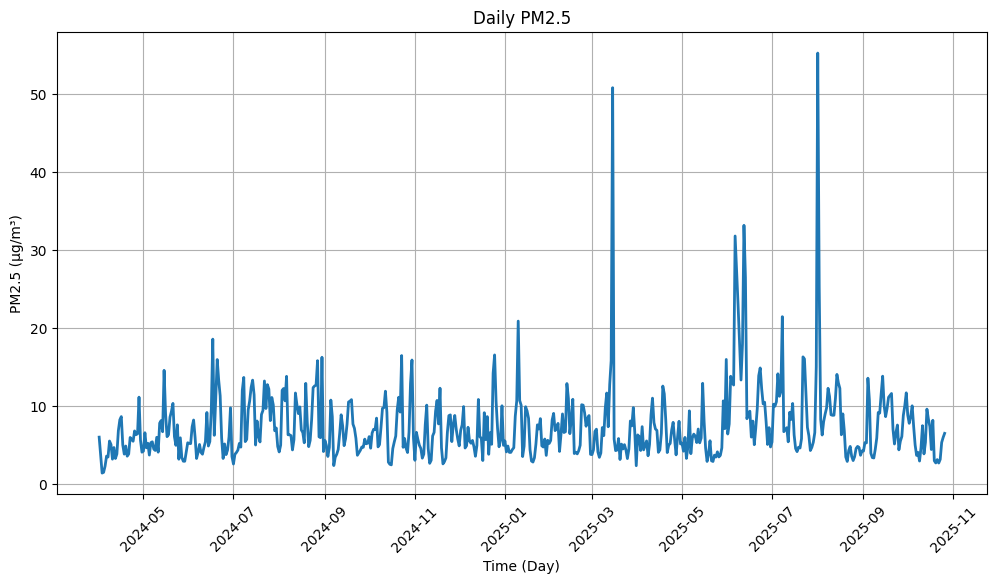

In [116]:
pm25_daily = (
    pm25.set_index("datetime_utc")["value"]
        .resample("1D")
        .mean()
        .reset_index()
)

plt.figure(figsize=(12,6))
plt.plot(pm25_daily["datetime_utc"], pm25_daily["value"], linewidth=2)
plt.title("Daily PM2.5")
plt.xlabel("Time (Day)")
plt.ylabel("PM2.5 (µg/m³)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

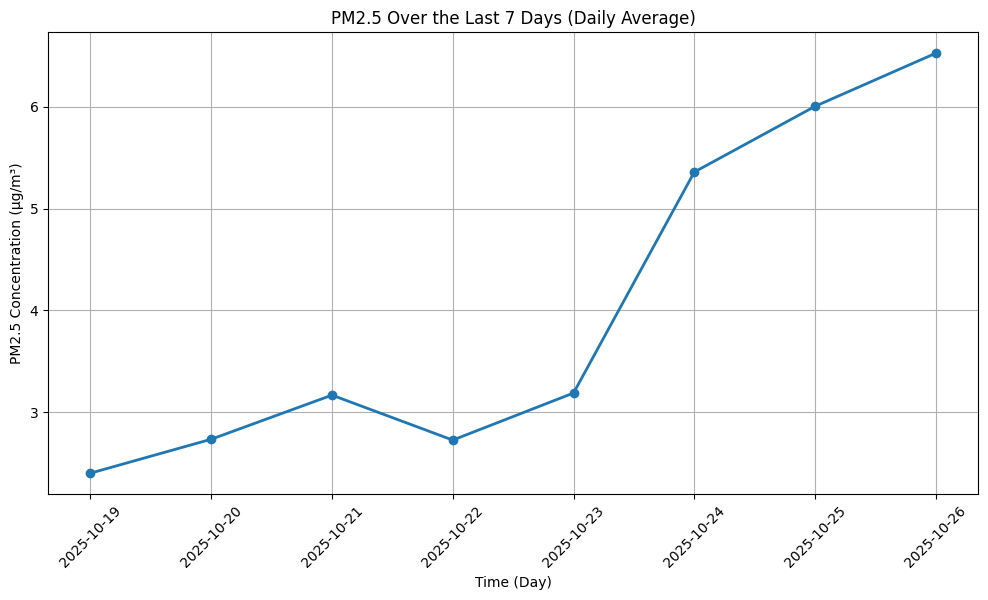

In [111]:
last_7_days = pm25[
    pm25["datetime_utc"] >= pm25["datetime_utc"].max() - pd.Timedelta(days=7)
].copy()

pm25_daily_7 = (
    last_7_days.set_index("datetime_utc")["value"]
                .resample("1D")
                .mean()
                .reset_index()
)

plt.figure(figsize=(12,6))
plt.plot(pm25_daily_7["datetime_utc"], pm25_daily_7["value"], marker='o', linewidth=2)

plt.title("PM2.5 Over the Last 7 Days (Daily Average)")
plt.xlabel("Time (Day)")
plt.ylabel("PM2.5 Concentration (µg/m³)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


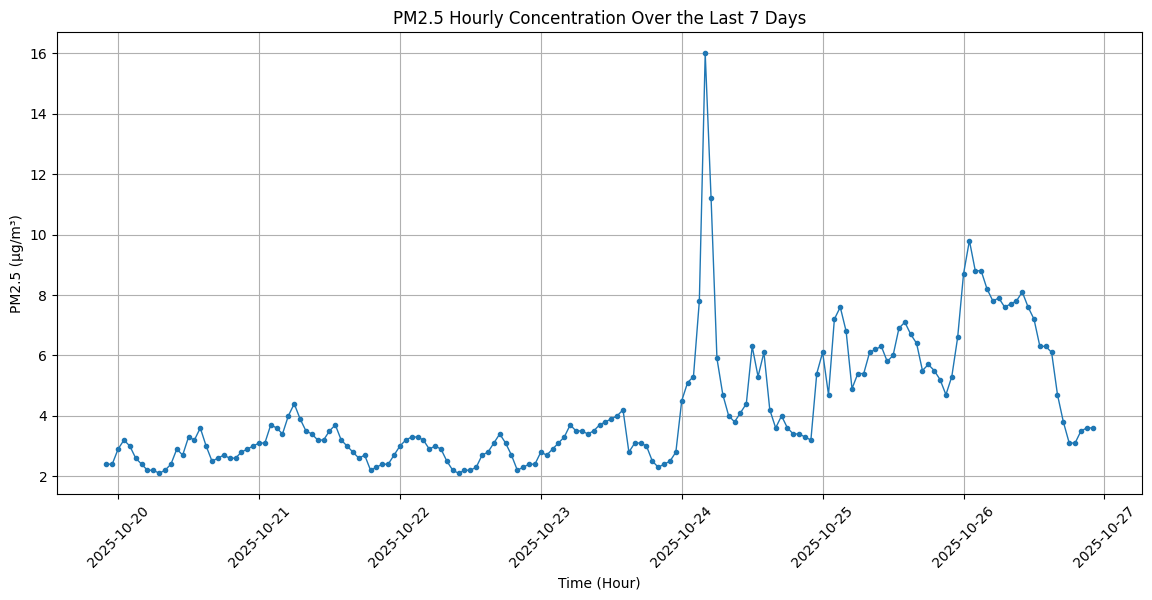

In [112]:
last_7_days_hours = pm25[
    pm25["datetime_utc"] >= pm25["datetime_utc"].max() - pd.Timedelta(days=7)
].sort_values("datetime_utc")

plt.figure(figsize=(14,6))
plt.plot(last_7_days_hours["datetime_utc"], last_7_days_hours["value"],
         marker='o', markersize=3, linewidth=1)

plt.title("PM2.5 Hourly Concentration Over the Last 7 Days")
plt.xlabel("Time (Hour)")
plt.ylabel("PM2.5 (µg/m³)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

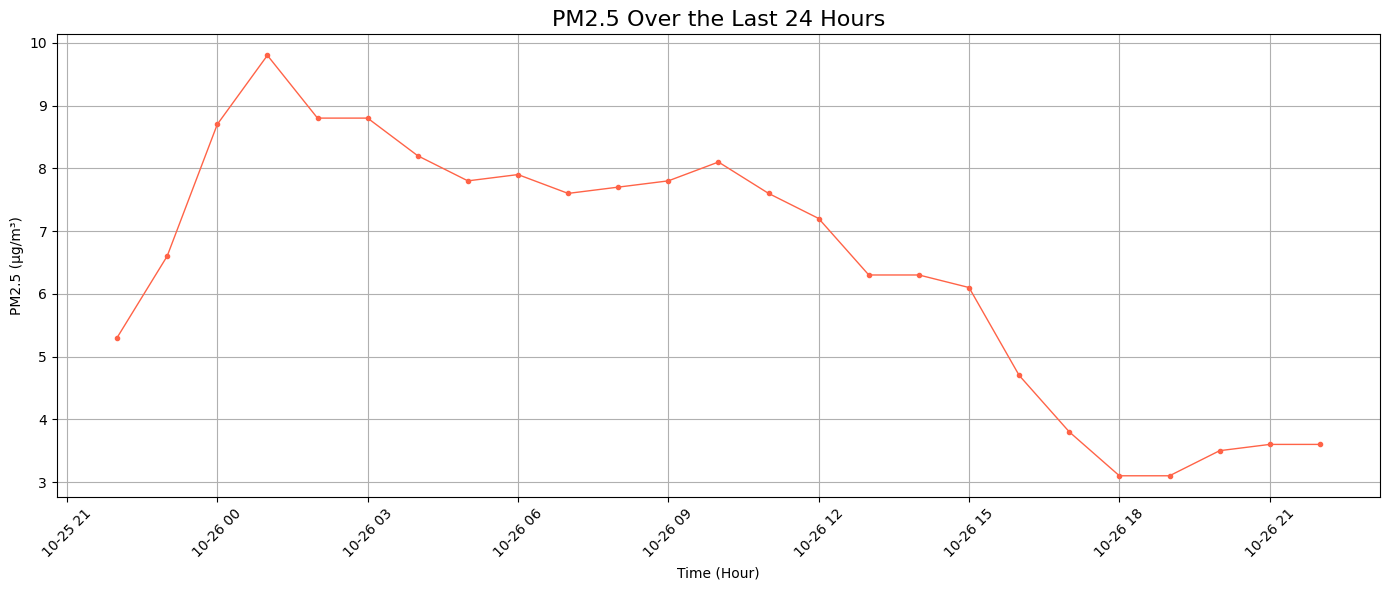

In [114]:
last_24h = pm25[
    pm25["datetime_utc"] >= pm25["datetime_utc"].max() - pd.Timedelta(hours=24)
].sort_values("datetime_utc")

plt.figure(figsize=(14,6))
plt.plot(
    last_24h["datetime_utc"],
    last_24h["value"],
    marker="o",
    markersize=3,
    linewidth=1,
    color="tomato"
)

plt.title("PM2.5 Over the Last 24 Hours", fontsize=16)
plt.xlabel("Time (Hour)")
plt.ylabel("PM2.5 (µg/m³)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

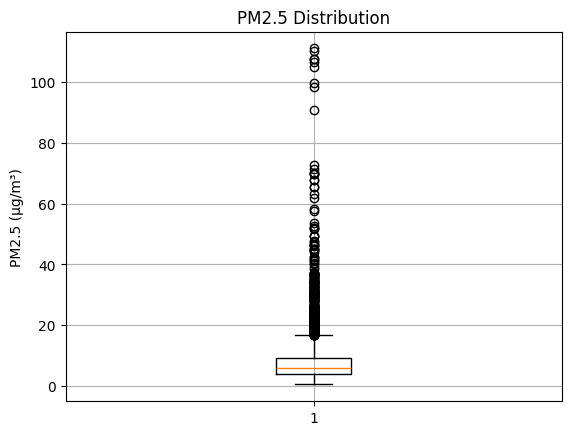

In [88]:
plt.boxplot(pm25["value"])
plt.title("PM2.5 Distribution")
plt.ylabel("PM2.5 (µg/m³)")
plt.grid(True)
plt.show()


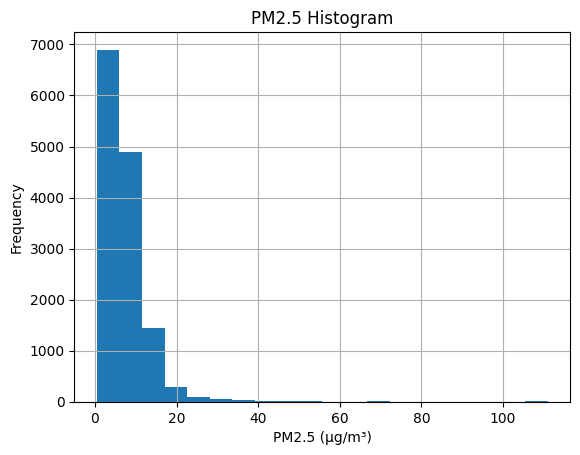

In [93]:
plt.hist(pm25["value"], bins=20)
plt.title("PM2.5 Histogram")
plt.xlabel("PM2.5 (µg/m³)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [56]:
con = sqlite3.connect("/content/campus_data (1).db")

weather = pd.read_sql_query("SELECT * FROM weather_forecast;", con)
con.close()

weather["time"] = pd.to_datetime(weather["time"])
weather.sort_values("time", inplace=True)
weather.head()


,time,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,...,soil_temperature_0cm,soil_temperature_6cm,soil_temperature_18cm,soil_temperature_54cm,soil_moisture_0_to_1cm,soil_moisture_1_to_3cm,soil_moisture_3_to_9cm,soil_moisture_9_to_27cm,soil_moisture_27_to_81cm,is_day
0,2025-10-26 00:00:00,51.2,58.0,36.9,46.5,1026.5,998.9,100.0,100.0,100.0,...,48.2,50.1,52.2,57.1,0.156,0.161,0.171,0.185,0.138,0.0
1,2025-10-26 01:00:00,50.5,64.0,38.8,46.0,1026.0,998.4,100.0,100.0,82.0,...,48.2,50.3,52.2,57.1,0.155,0.161,0.171,0.185,0.139,0.0
2,2025-10-26 02:00:00,50.7,62.0,38.1,45.0,1025.5,997.9,100.0,100.0,81.0,...,47.9,50.0,52.2,57.1,0.155,0.161,0.171,0.185,0.139,0.0
3,2025-10-26 03:00:00,50.9,60.0,37.5,45.9,1025.4,997.8,100.0,100.0,23.0,...,47.2,49.8,52.1,57.1,0.155,0.161,0.170,0.185,0.139,0.0
4,2025-10-26 04:00:00,50.9,59.0,37.1,45.6,1025.3,997.7,100.0,100.0,0.0,...,47.0,49.4,52.0,57.0,0.155,0.160,0.170,0.185,0.139,0.0


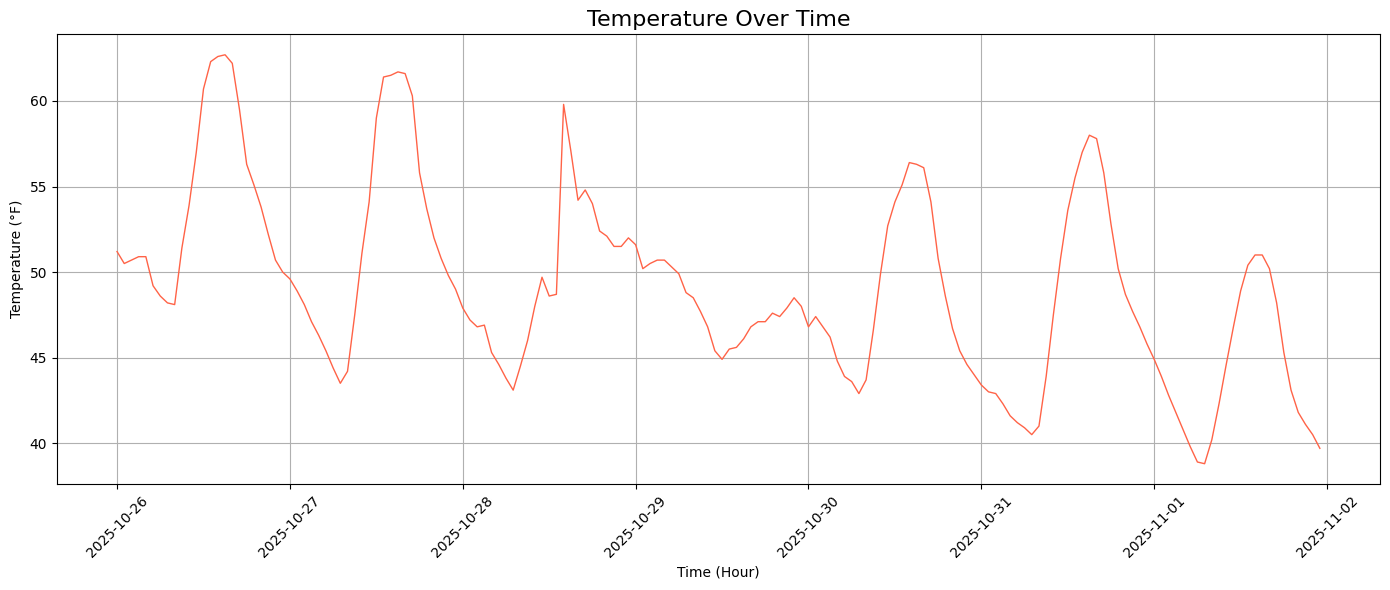

In [100]:
plt.figure(figsize=(14,6))
plt.plot(weather["time"], weather["temperature_2m"], linewidth=1, color="tomato")

plt.title("Temperature Over Time", fontsize=16)
plt.xlabel("Time (Hour)")
plt.ylabel("Temperature (°F)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


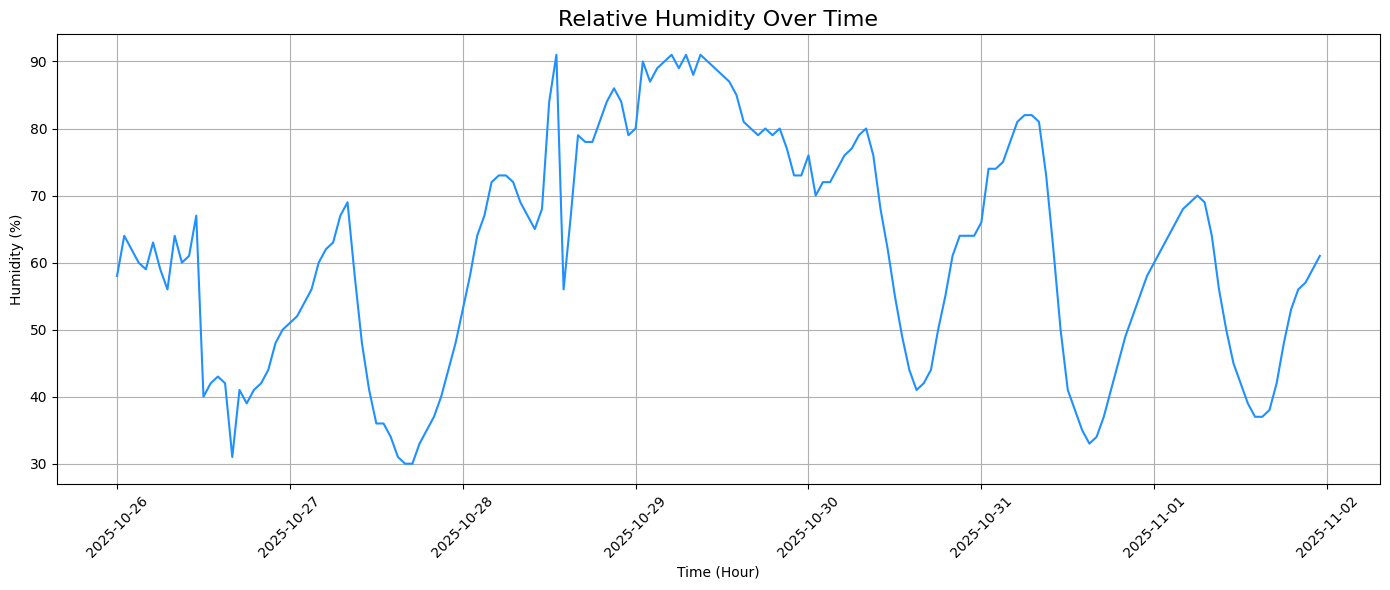

In [101]:
plt.figure(figsize=(14,6))
plt.plot(weather["time"], weather["relative_humidity_2m"], color="dodgerblue")

plt.title("Relative Humidity Over Time", fontsize=16)
plt.xlabel("Time (Hour)")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

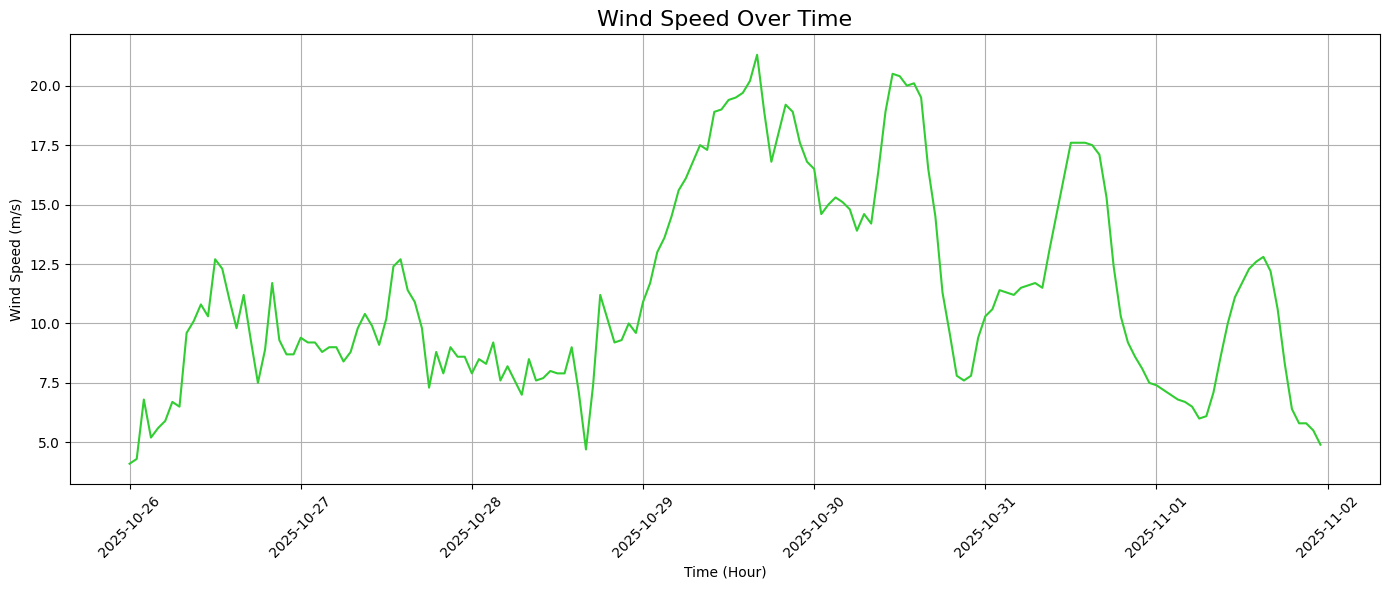

In [102]:
plt.figure(figsize=(14,6))
plt.plot(weather["time"], weather["wind_speed_10m"], color="limegreen")

plt.title("Wind Speed Over Time", fontsize=16)
plt.xlabel("Time (Hour)")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

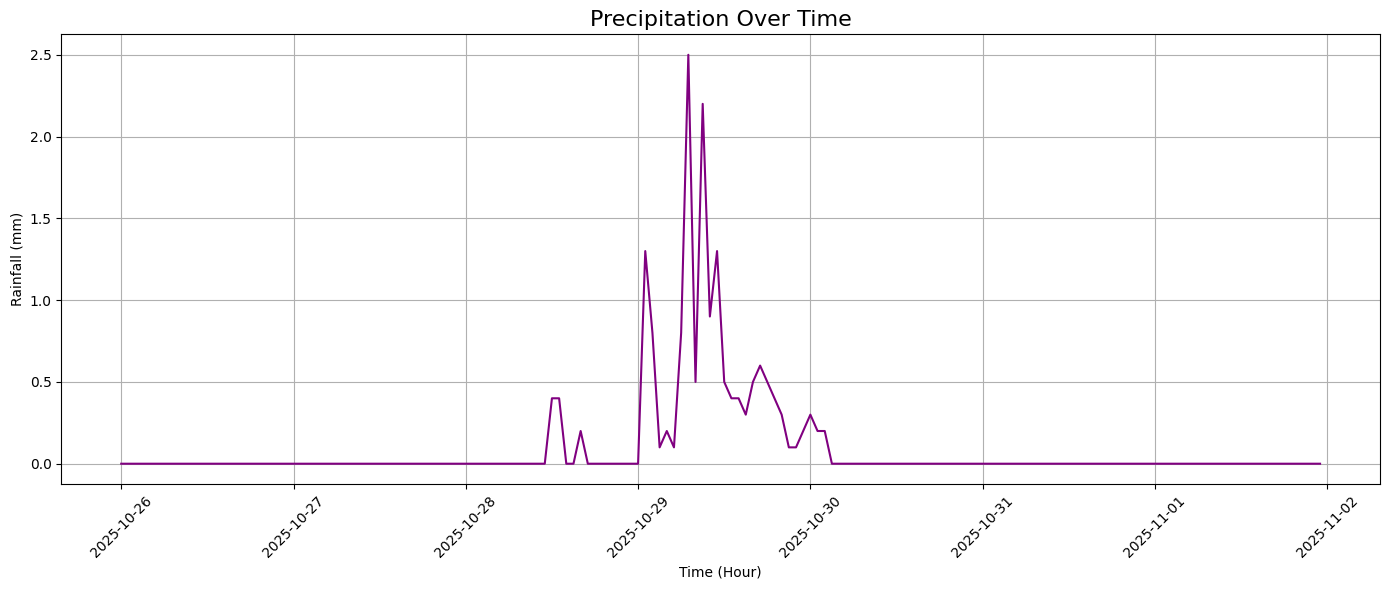

In [103]:
plt.figure(figsize=(14,6))
plt.plot(weather["time"], weather["precipitation"], color="purple")

plt.title("Precipitation Over Time", fontsize=16)
plt.xlabel("Time (Hour)")
plt.ylabel("Rainfall (mm)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

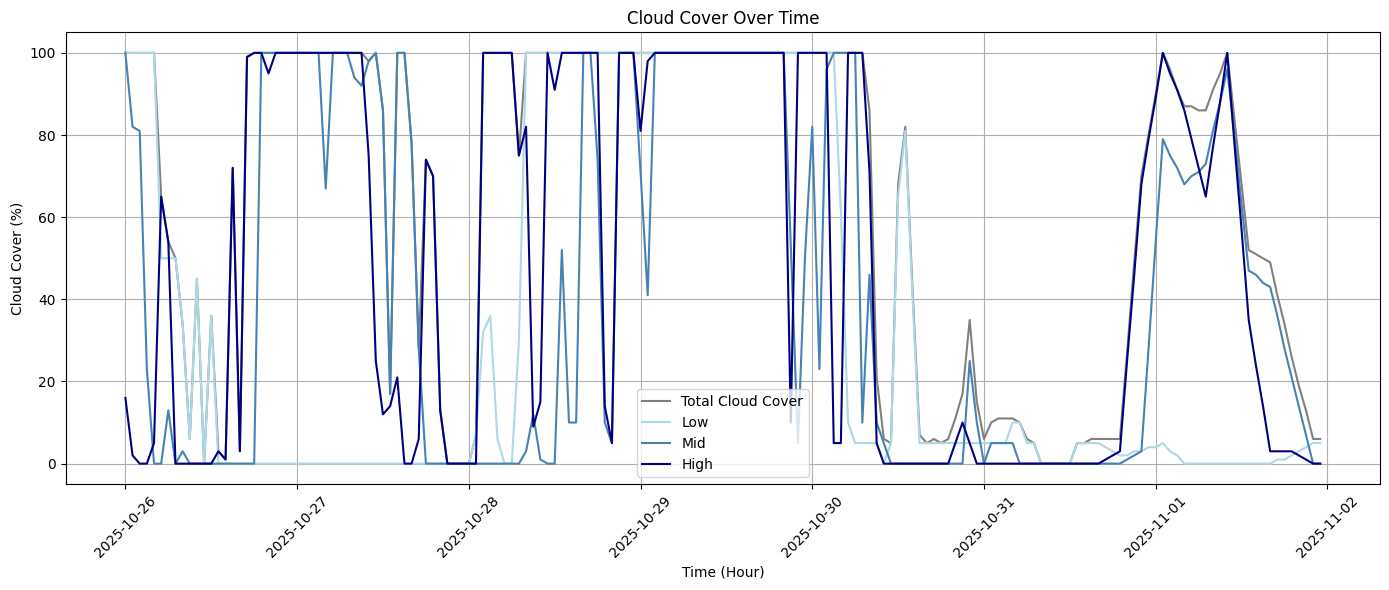

In [104]:
plt.figure(figsize=(14,6))

plt.plot(weather["time"], weather["cloud_cover"], label="Total Cloud Cover", color="gray")
plt.plot(weather["time"], weather["cloud_cover_low"], label="Low", color="lightblue")
plt.plot(weather["time"], weather["cloud_cover_mid"], label="Mid", color="steelblue")
plt.plot(weather["time"], weather["cloud_cover_high"], label="High", color="navy")

plt.title("Cloud Cover Over Time")
plt.xlabel("Time (Hour)")
plt.ylabel("Cloud Cover (%)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

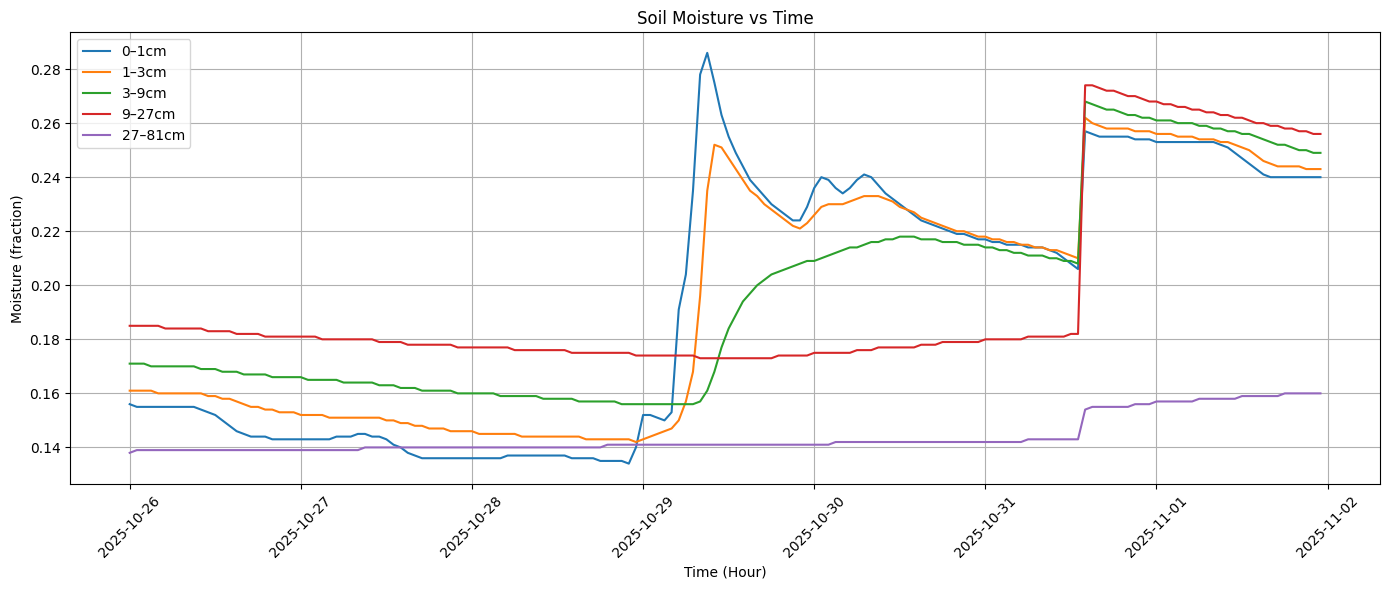

In [105]:
plt.figure(figsize=(14,6))

plt.plot(weather["time"], weather["soil_moisture_0_to_1cm"], label="0–1cm")
plt.plot(weather["time"], weather["soil_moisture_1_to_3cm"], label="1–3cm")
plt.plot(weather["time"], weather["soil_moisture_3_to_9cm"], label="3–9cm")
plt.plot(weather["time"], weather["soil_moisture_9_to_27cm"], label="9–27cm")
plt.plot(weather["time"], weather["soil_moisture_27_to_81cm"], label="27–81cm")

plt.title("Soil Moisture vs Time")
plt.xlabel("Time (Hour)")
plt.ylabel("Moisture (fraction)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()